In [29]:
#using LSTM which is long short term memory
#using to predict stock price of a corporation
#importing the libraries
import pandas_datareader as web
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt

In [30]:
#getting the stock info
s_info = web.DataReader('AAPL', data_source='yahoo', start='2010-01-01', end='2018-08-08')
#showing the data
s_info

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526072,352410800.0,6.439648
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.539882
2010-01-05,7.699643,7.616071,7.664286,7.656428,601904800.0,6.551187
2010-01-06,7.686786,7.526786,7.656428,7.534643,552160000.0,6.446983
2010-01-07,7.571429,7.466072,7.562500,7.520714,477131200.0,6.435065
...,...,...,...,...,...,...
2018-08-02,52.095001,50.087502,50.145000,51.847500,249616000.0,49.881802
2018-08-03,52.185001,51.369999,51.757500,51.997501,133789600.0,50.026119
2018-08-06,52.312500,51.767502,52.000000,52.267502,101701600.0,50.285881


In [31]:
#checking the number of rows and columns
s_info.shape

(2166, 6)

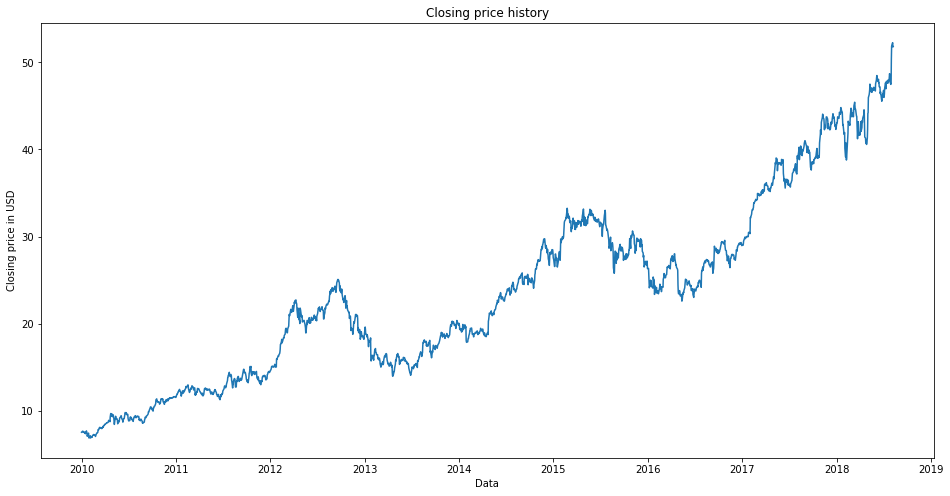

In [32]:
#visualizing the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing price history')
plt.plot(s_info['Close'])
plt.xlabel("Data")
plt.ylabel('Closing price in USD')
plt.show()

In [33]:
#creating a dataframe which consists of only close column
data = s_info.filter(['Close'])
#coverting dataframe to numpy array
dataset = data.values

In [34]:
#getting the number f rows to train
#taking 80% as training
train_data_len = math.ceil(len(dataset)*.8)

In [35]:
#checfking the length of traning data
train_data_len

1733

In [36]:
#scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
#computes the min and max value for scaling and transforms data based of those 2 values
#values can be 0 or 1 or anything in between
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.014692  ],
       [0.01727175],
       [0.01756276],
       ...,
       [1.        ],
       [0.98920905],
       [0.98997983]])

In [37]:
#creating the training dataset
#so first we should create scaled training set
train_data = scaled_data[0:train_data_len, :]

In [38]:
#spliting the data into x_train and y_train datasets
x_train =[]
y_train =[]

for i in range(60,len(train_data)):
    #appending 60 values to x_train dataset
    x_train.append(train_data[i-60:i,0]) #0 to 59 values
    y_train.append(train_data[i,0]) #values after 60
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([1.46920025e-02, 1.72717505e-02, 1.75627553e-02, 1.48807586e-02,
       1.45740233e-02, 1.56751411e-02, 1.42043657e-02, 1.23246064e-02,
       1.46290802e-02, 1.36695374e-02, 1.09167532e-02, 1.80818531e-02,
       1.54785092e-02, 1.25998806e-02, 4.48310320e-03, 8.66733635e-03,
       1.09246185e-02, 1.24504509e-02, 5.69432444e-03, 7.86527756e-06,
       2.10784188e-03, 2.99659724e-03, 5.64713278e-03, 0.00000000e+00,
       2.68199664e-03, 1.62807045e-03, 3.25615140e-03, 2.41458771e-03,
       5.20668773e-03, 6.55161869e-03, 8.92688001e-03, 8.25835242e-03,
       8.55722247e-03, 7.56621850e-03, 6.58307980e-03, 3.94040955e-03,
       6.77184646e-03, 7.82577266e-03, 9.88642287e-03, 1.33234757e-02,
       1.32133618e-02, 1.35908846e-02, 1.46762719e-02, 2.11571136e-02,
       2.12593517e-02, 2.43582081e-02, 2.57896466e-02, 2.63087549e-02,
       2.71739144e-02, 2.50031398e-02, 2.54829112e-02, 2.52233676e-02,
       2.56402168e-02, 2.37525922e-02, 2.57188696e-02, 2.85581613e-02,
     

In [39]:
#converting x_train and y_train to numpy arrays for training them in LSTM
x_train, y_train = np.array(x_train), np.array(y_train)

In [40]:
#reshaping the data
# we should reshape the data coz lstm wants 3D image, no of smaples, time stamps and features
#so we are converting input image from 2D t0 3D
x_train.shape

(1673, 60)

In [41]:
#so cinverting image from 2d to 3d
x_train = np.reshape(x_train, (1673, 60, 1))
#here no of smamples is the no of rows, timestamps are no of columns and featires are 1
x_train.shape

(1673, 60, 1)

In [47]:
#building LSTM model
model = Sequential()
#adding LSTM layers giving 50 layers
model.add(LSTM(50, return_sequences= True, input_shape= (x_train.shape[1],1)))
#adding second lstm layer
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [48]:
#compling the model
model.compile(optimizer='adam', loss = 'mean_squared_error')
#we use adam optimizer
#we use mean_squared_error loss function
#in optimizers are used to improve the loss function and loss functions helps us to know how well model did on training 

In [49]:
#training the model
model.fit(x_train, y_train, batch_size =1, epochs = 1)
#eopch is the no of iterations the dataset should perform

1673/1673 [==============================] - 100s 60ms/step - loss: 6.5250e-04


In [50]:
#now creating testing dataset
test_data = scaled_data[train_data_len - 60: , :]
#creating the datasets x_test and y_test
x_test =[]
y_test = dataset[train_data_len:, :]
#creating x_test
for i in range(60, len(test_data)):
    #appending past 60 values to x_test dataset
    x_test.append(test_data[i-60:i, 0])
    


In [51]:
#converting data to numpy
x_test = np.array(x_test)

In [52]:
#reshaping data for lstm (2D to 3D)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [53]:
#getting the models predicted price values for x_test dataset
predictions = model.predict(x_test)
#inverse transform the data
predictions = scaler.inverse_transform(predictions)
#we want predictions to contain same values that y_test dataset contains


In [54]:
#evaluating our model
#by getting root mean square error
#rmse is good measure of how accurate the model predicts the respose
#it is it standard deviation of residuals and lower values of rsme can better fit
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.2183963960643176

G:\anac\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


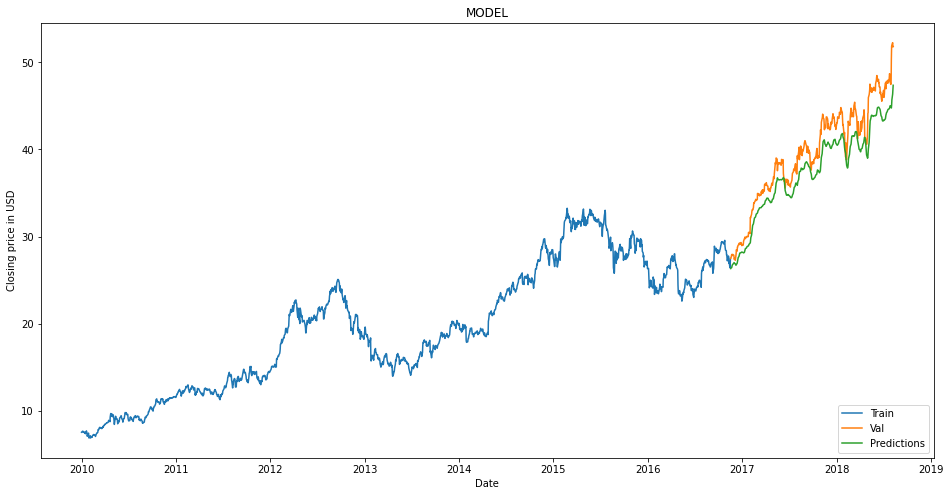

In [56]:
#plot the data
train = data[:train_data_len]
validation = data[train_data_len:]
validation['Predictions'] = predictions
#visualizing the data
plt.figure(figsize=(16,8))
plt.title('MODEL')
plt.xlabel('Date')
plt.ylabel('Closing price in USD')
plt.plot(train['Close'])
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [57]:
#blue is the data where its been trained on
#reddish orange is the actual values for rest of the days
#green is the predicted value

In [58]:
#to show the actual price and predicted price
validation

,Close,Predictions
Date,,
2016-11-17,27.487499,26.322044
2016-11-18,27.514999,26.372160
2016-11-21,27.932501,26.444452
2016-11-22,27.950001,26.573696
2016-11-23,27.807501,26.709782
...,...,...
2018-08-02,51.847500,45.083397
2018-08-03,51.997501,45.705154
2018-08-06,52.267502,46.358955


In [69]:
#getting predict the closing price for apple stock for a particular day
apl_quote = web.DataReader('AAPL', data_source='yahoo', start = '2010-01-01', end='2018-08-08')
new_info = apl_quote.filter(['Close'])
#get the last 60 day closing prce and convert the dataframe into an array
last_60_days = new_info[-60:].values
#scaqle the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test =[]
#append past 60 days
X_test.append(last_60_days_scaled)
#convert X_test to numpy array
X_test = np.array(X_test)
#reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[47.648914]]


In [63]:
#this the model predicted price

In [71]:
#getting predict the closing price for apple stock for a particular day
apl_quote_2 = web.DataReader('AAPL', data_source='yahoo', start = '2019-12-18', end='2019-12-18')
print(apl_quote_2['Close'])

Date
2019-12-17    70.102501
2019-12-18    69.934998
Name: Close, dtype: float64
